# View SED provided by Kirk
=========================================


- author : Sylvie  Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- creation data : 2017 - 02 - 09

In [1]:
import rise
rise.__version__

'4.0.0b1'

In [2]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [86]:
from astropy.io import fits

In [3]:
import pandas as pd
import os
import re
import numpy as np

In [33]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [5]:
from scipy.interpolate import interp1d

## Files to open

- Star.B1.No.3.xlsx

- Gal.S0.template.xlsx	
- Gal.BC.95.No.1.xlsx	
- Gal.GS.39.No.2.xlsx

- Pick.UK.No.2.22.xlsx	
- pickles_uk_22.fits
- Pick.UK.50.No.4.xlsx	
- pickles_uk_50.fits

- Pickles.No.1.110.xlsx	
- pickles_110.fits
- pickles_110.ascii.txt	

In [10]:
path_sed='./SED'

In [72]:
filename_star=['Star.B1.No.3.xlsx']
filename_gal=['Gal.S0.template.xlsx','Gal.BC.95.No.1.xlsx','Gal.GS.39.No.2.xlsx']
filename_pick_uk_xcl=['Pick.UK.No.2.22.xlsx','Pick.UK.50.No.4.xlsx']
filename_pick_uk_fits=['pickles_uk_22.fits','pickles_uk_50.fits']    # fits are the same file as above xcl file
filename_pick_110=['Pickles.No.1.110.xlsx','pickles_110.fits','pickles_110.ascii.txt'] # same files

## Star

In [11]:
fullfilename_star=os.path.join(path_sed,filename_star[0])

In [13]:
file_star= pd.ExcelFile(fullfilename_star)

In [14]:
sheet_name=file_star.sheet_names[0]

In [27]:
#df_star = file_star.parse(sheet_name,header=3,usecols=range(0,5))
df_star = file_star.parse(sheet_name,usecols=range(0,2))
df_star.columns = ["wl","flux"]

In [28]:
df_star.head()

,wl,flux
0,1240,4.022540e-14
1,1245,6.888950e-14
2,1250,5.822420e-14
3,1255,5.168520e-14
4,1260,4.930970e-14


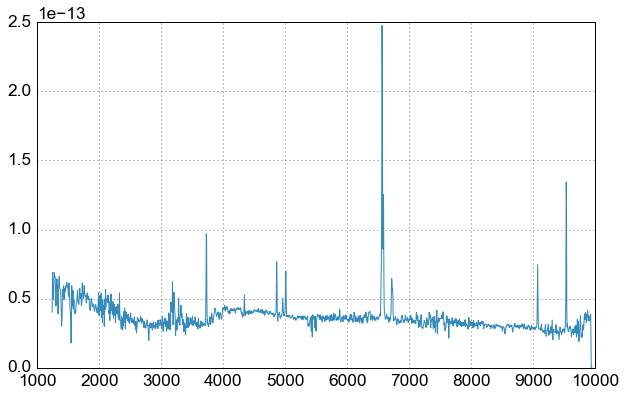

In [34]:
plt.plot(df_star["wl"],df_star["flux"])

## Galaxy

In [36]:
fullfilename_gal= [  os.path.join(path_sed,filename_gal[i])  for i in range(0,3) ]

In [38]:
file_gal= [ pd.ExcelFile(fullfilename) for fullfilename in fullfilename_gal ]

In [39]:
sheet_names = [ file.sheet_names[0] for file in file_gal ]

In [41]:
df_gal = [ file.parse() for file in file_gal ]

In [54]:
df_gal[1]=file_gal[1].parse(header=22,usecols=range(0,2))

In [56]:
for df in df_gal:
  df.columns = ["wl","flux"]  

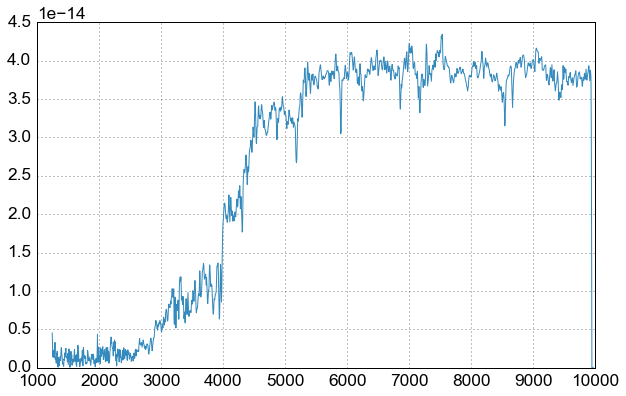

In [64]:
index=0
x=df_gal[index]["wl"]
y=df_gal[index]["flux"]
plt.plot(x,y)

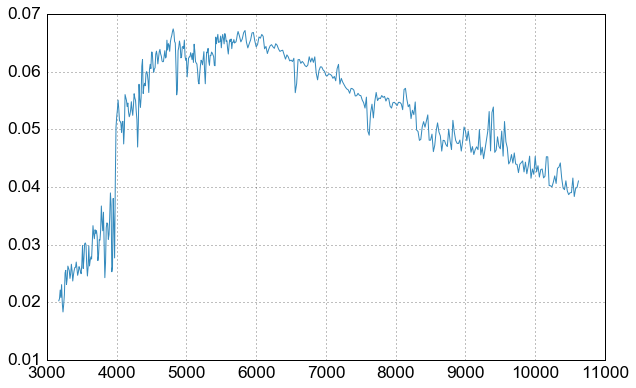

In [65]:
index=2
x=df_gal[index]["wl"]
y=df_gal[index]["flux"]
plt.plot(x,y)

(array([  69,   70,   71, ..., 1105, 1106, 1107]),)


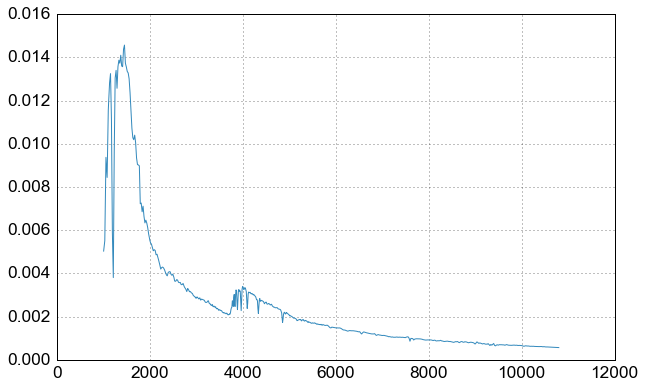

In [71]:
index=1
x=np.array(df_gal[index]["wl"])
y=np.array(df_gal[index]["flux"])
sel=np.where(np.logical_and(x>1000.,x<11000.))
print sel
xx=x[sel]
yy=y[sel]
plt.plot(xx,yy)

## filename_pick_uk_xcl

In [73]:
fullfilename_pick_uk= [  os.path.join(path_sed,filename_pick_uk_xcl[i])  for i in range(0,2) ]

In [74]:
file_pick_uk= [ pd.ExcelFile(fullfilename) for fullfilename in fullfilename_pick_uk ]

In [81]:
df_pick_uk = [ file.parse(header=38,usecols=range(0,2)) for file in file_pick_uk ]

In [84]:
for df in df_pick_uk:
  df.columns = ["wl","flux"]  

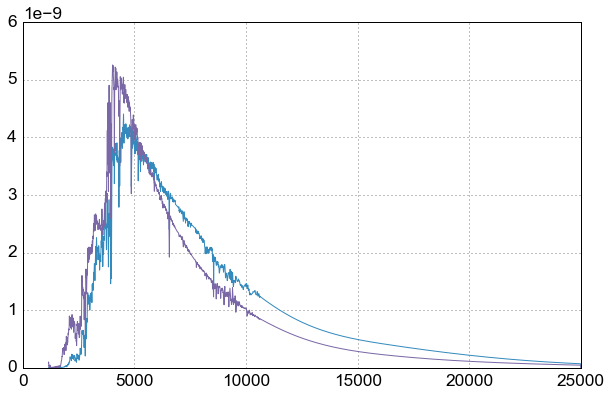

In [85]:
for index in range(0,2):
    plt.plot(df_pick_uk[index]["wl"],df_pick_uk[index]["flux"])

## filename_pick_uk_fits

In [87]:
fullfilename_pick_uk_fits= [os.path.join(path_sed,filename_pick_uk_fits[i])  for i in range(0,2) ]

In [88]:
hdulist_pick_uk_fits= [fits.open(fullfilename) for fullfilename in fullfilename_pick_uk_fits ]

In [89]:
for hdulist in hdulist_pick_uk_fits:
    hdulist.info()

Filename: ./SED/pickles_uk_22.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      35   ()      
  1              BinTableHDU     19   4771R x 2C   [1E, 1E]   
Filename: ./SED/pickles_uk_50.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      35   ()      
  1              BinTableHDU     19   4771R x 2C   [1E, 1E]   


In [91]:
tabledata_pick_uk_fits = [ hdulist[1].data for hdulist in hdulist_pick_uk_fits]

In [94]:
for tabledata in tabledata_pick_uk_fits :
    print tabledata.columns

ColDefs(
    name = 'WAVELENGTH'; format = '1E'; unit = 'angstroms'; disp = 'G15.7'
    name = 'FLUX'; format = '1E'; unit = 'flam'; disp = 'G15.7'
)
ColDefs(
    name = 'WAVELENGTH'; format = '1E'; unit = 'angstroms'; disp = 'G15.7'
    name = 'FLUX'; format = '1E'; unit = 'flam'; disp = 'G15.7'
)


In [96]:
wavelength_table = [ tabledata.field('WAVELENGTH') for tabledata in tabledata_pick_uk_fits ]

In [97]:
flux_table = [ tabledata.field('FLUX') for tabledata in tabledata_pick_uk_fits ]

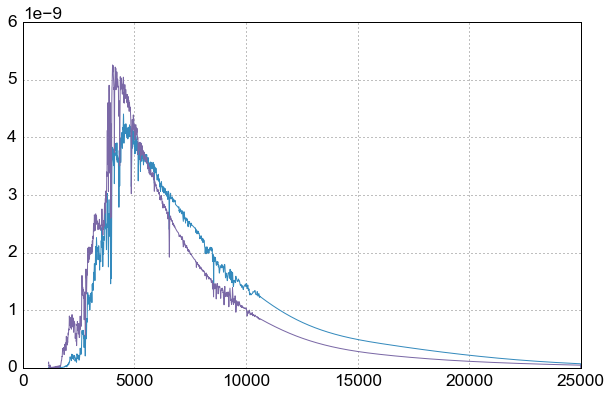

In [98]:
for index in range(0,2):
    plt.plot(wavelength_table[index], flux_table[index])

## filename_pick_110

In [113]:
fullfilename_pick_110= [  os.path.join(path_sed,filename_pick_110[i])  for i in range(0,3) ]

In [100]:
file_pick_110_xcl =  pd.ExcelFile(fullfilename_pick_110[0])

In [103]:
df_pick_110_xcl =  file_pick_110_xcl.parse(header=38,usecols=range(0,2))
df_pick_110_xcl.columns = ["wl","flux"]  

In [105]:
hdulist_pick_110_fits= fits.open(fullfilename_pick_110[1])

In [106]:
tabledata_pick_110_fits =  hdulist_pick_110_fits[1].data

In [108]:
wavelength_table =  tabledata_pick_110_fits.field('WAVELENGTH') 
flux_table =  tabledata_pick_110_fits.field('FLUX') 

In [114]:
file_pick_110_txt=np.loadtxt(fullfilename_pick_110[2],skiprows=40) 

In [118]:
wavelength_arr=file_pick_110_txt[:,0]
flux_arr=file_pick_110_txt[:,1]

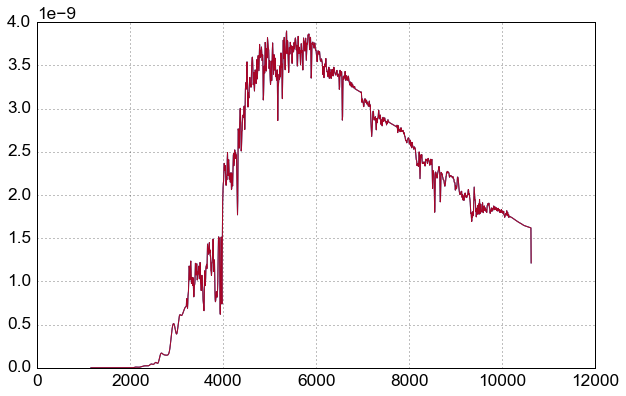

In [121]:
plt.plot(df_pick_110_xcl["wl"],df_pick_110_xcl["flux"] )
plt.plot(wavelength_table ,flux_table)
plt.plot(wavelength_arr,flux_arr)